In [1]:
import hdbscan
import pandas as pd
import numpy as np
%matplotlib ipympl
#%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import manifold
from ipywidgets import interact, Output
from IPython.display import clear_output

import sys
sys.path.append('..')
from src.band_plotters import DATA_DIRECTORY
from src.cluster_plotters import plot_cluster_ellipses, plot_groups

In [2]:
FINGERPRINT_NAME = "all_k_branches_histogram_all_energies"
FINGERPRINT_LENGTH = 60
PERPLEXITY = 30
FLAT_ONLY = True
BORING_COLUMNS = ["segments", "flat_segments", "flatness_score", "binary_flatness", "horz_flat_seg", "exfoliation_eg", "band_gap", "A", "B", "C", "D", "E", "F"]
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

## Load Data

In [3]:
df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")
if FLAT_ONLY:
    df = df[df.horz_flat_seg>0]
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,52,53,54,55,56,57,58,59,fx,fy
ID,,,,,,,,,,,,,,,,,,,,,
2dm-3,TlS,AB,2,4,4,0.84646,bottom-up,1,3,0.095794,...,205.0,102.0,49.0,32.0,99.0,107.0,208.0,156.0,30.732214,36.278020
2dm-21,TaI3,AB3,162,3,3,0.88201,bottom-up,1,1,0.097255,...,0.0,38.0,224.0,116.0,126.0,96.0,164.0,244.0,-136.149300,-16.067595
2dm-22,Li2O,AB2,164,3,3,0.96678,bottom-up,1,4,0.037593,...,0.0,0.0,0.0,16.0,173.0,31.0,121.0,142.0,-97.150955,-33.349903
2dm-25,VBr4,AB4,123,3,3,0.97834,bottom-up,1,2,0.140290,...,0.0,0.0,56.0,134.0,141.0,26.0,23.0,145.0,-102.559204,-24.045895
2dm-29,SBr,AB,2,4,4,0.82037,bottom-up,1,3,0.067035,...,94.0,158.0,0.0,84.0,42.0,10.0,267.0,311.0,62.445557,17.247498


## Cluster

In [4]:
fingerprint_cols = [str(i) for i in range(FINGERPRINT_LENGTH)]
BORING_COLUMNS += fingerprint_cols

In [7]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=3, p=0.2)
clusterer.fit(df[fingerprint_cols])

df["labels"] = clusterer.labels_

interactive(children=(IntSlider(value=38, description='label', max=77, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

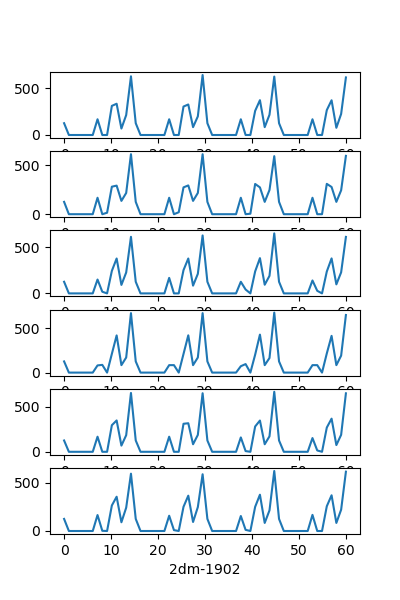

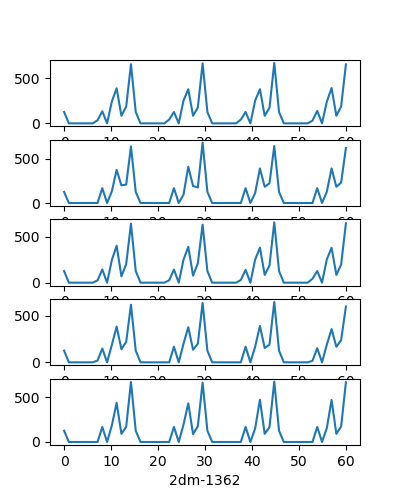

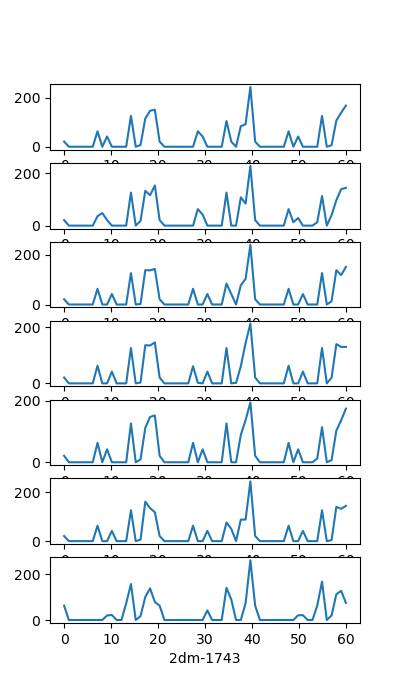

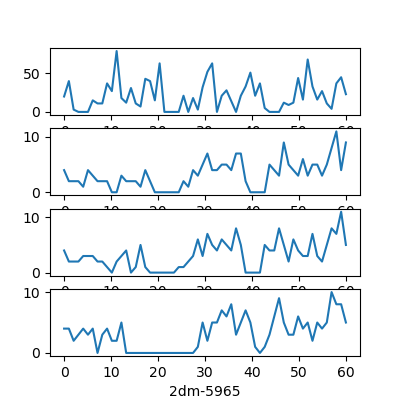

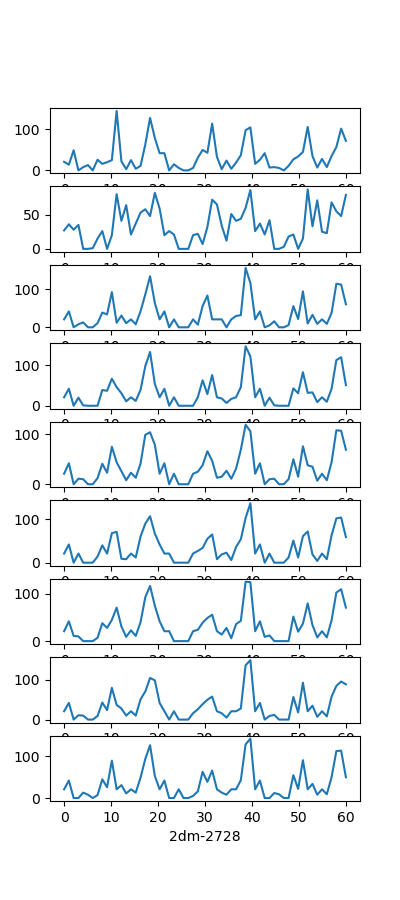

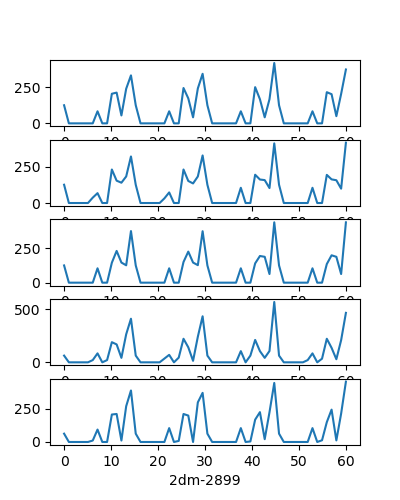

In [9]:
def view_cluster(label):
    display(df[df.labels==label].drop(BORING_COLUMNS, axis=1).head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols])
        ax[i].set_xlabel(index)
    
    
interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

## Rerun TSNE (ONLY IF ON FLAT SUBSET)

In [7]:
if FLAT_ONLY:
    tsne = manifold.TSNE(n_components=2, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=PERPLEXITY ,n_iter=10000, verbose=2)
    fingerprint_2d = tsne.fit_transform(df[fingerprint_cols])
    df.fx, df.fy = fingerprint_2d[:, 0], fingerprint_2d[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2005 samples in 0.002s...
[t-SNE] Computed neighbors for 2005 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2005
[t-SNE] Computed conditional probabilities for sample 2000 / 2005
[t-SNE] Computed conditional probabilities for sample 2005 / 2005
[t-SNE] Mean sigma: 255.346554
[t-SNE] Computed conditional probabilities in 0.176s
[t-SNE] Iteration 50: error = 70.1146851, gradient norm = 0.0196195 (50 iterations in 0.552s)
[t-SNE] Iteration 100: error = 67.8221970, gradient norm = 0.0039317 (50 iterations in 0.398s)
[t-SNE] Iteration 150: error = 67.4739380, gradient norm = 0.0015506 (50 iterations in 0.363s)
[t-SNE] Iteration 200: error = 67.3279114, gradient norm = 0.0012603 (50 iterations in 0.437s)
[t-SNE] Iteration 250: error = 67.2175674, gradient norm = 0.0008304 (50 iterations in 0.465s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.217567
[t-SNE] Iteration 300: er

[t-SNE] Iteration 4150: error = 0.8820378, gradient norm = 0.0002466 (50 iterations in 0.577s)
[t-SNE] Iteration 4200: error = 0.8819737, gradient norm = 0.0002530 (50 iterations in 0.541s)
[t-SNE] Iteration 4250: error = 0.8819284, gradient norm = 0.0002470 (50 iterations in 0.547s)
[t-SNE] Iteration 4300: error = 0.8819053, gradient norm = 0.0003149 (50 iterations in 0.624s)
[t-SNE] Iteration 4350: error = 0.8818353, gradient norm = 0.0002782 (50 iterations in 0.612s)
[t-SNE] Iteration 4400: error = 0.8817764, gradient norm = 0.0002629 (50 iterations in 0.590s)
[t-SNE] Iteration 4450: error = 0.8817329, gradient norm = 0.0002770 (50 iterations in 0.605s)
[t-SNE] Iteration 4500: error = 0.8816429, gradient norm = 0.0003132 (50 iterations in 0.856s)
[t-SNE] Iteration 4550: error = 0.8815337, gradient norm = 0.0003249 (50 iterations in 0.703s)
[t-SNE] Iteration 4600: error = 0.8814434, gradient norm = 0.0004292 (50 iterations in 0.642s)
[t-SNE] Iteration 4650: error = 0.8813744, gradien

[t-SNE] Iteration 8500: error = 0.8784037, gradient norm = 0.0001407 (50 iterations in 0.581s)
[t-SNE] Iteration 8550: error = 0.8784152, gradient norm = 0.0001368 (50 iterations in 0.617s)
[t-SNE] Iteration 8600: error = 0.8783497, gradient norm = 0.0001868 (50 iterations in 0.629s)
[t-SNE] Iteration 8650: error = 0.8783284, gradient norm = 0.0002153 (50 iterations in 0.630s)
[t-SNE] Iteration 8700: error = 0.8782825, gradient norm = 0.0001874 (50 iterations in 0.692s)
[t-SNE] Iteration 8750: error = 0.8782403, gradient norm = 0.0002566 (50 iterations in 0.640s)
[t-SNE] Iteration 8800: error = 0.8781915, gradient norm = 0.0004031 (50 iterations in 0.642s)
[t-SNE] Iteration 8850: error = 0.8780532, gradient norm = 0.0002624 (50 iterations in 0.604s)
[t-SNE] Iteration 8900: error = 0.8779833, gradient norm = 0.0001958 (50 iterations in 0.592s)
[t-SNE] Iteration 8950: error = 0.8779315, gradient norm = 0.0002237 (50 iterations in 0.604s)
[t-SNE] Iteration 9000: error = 0.8779365, gradien

## Plots

Output()

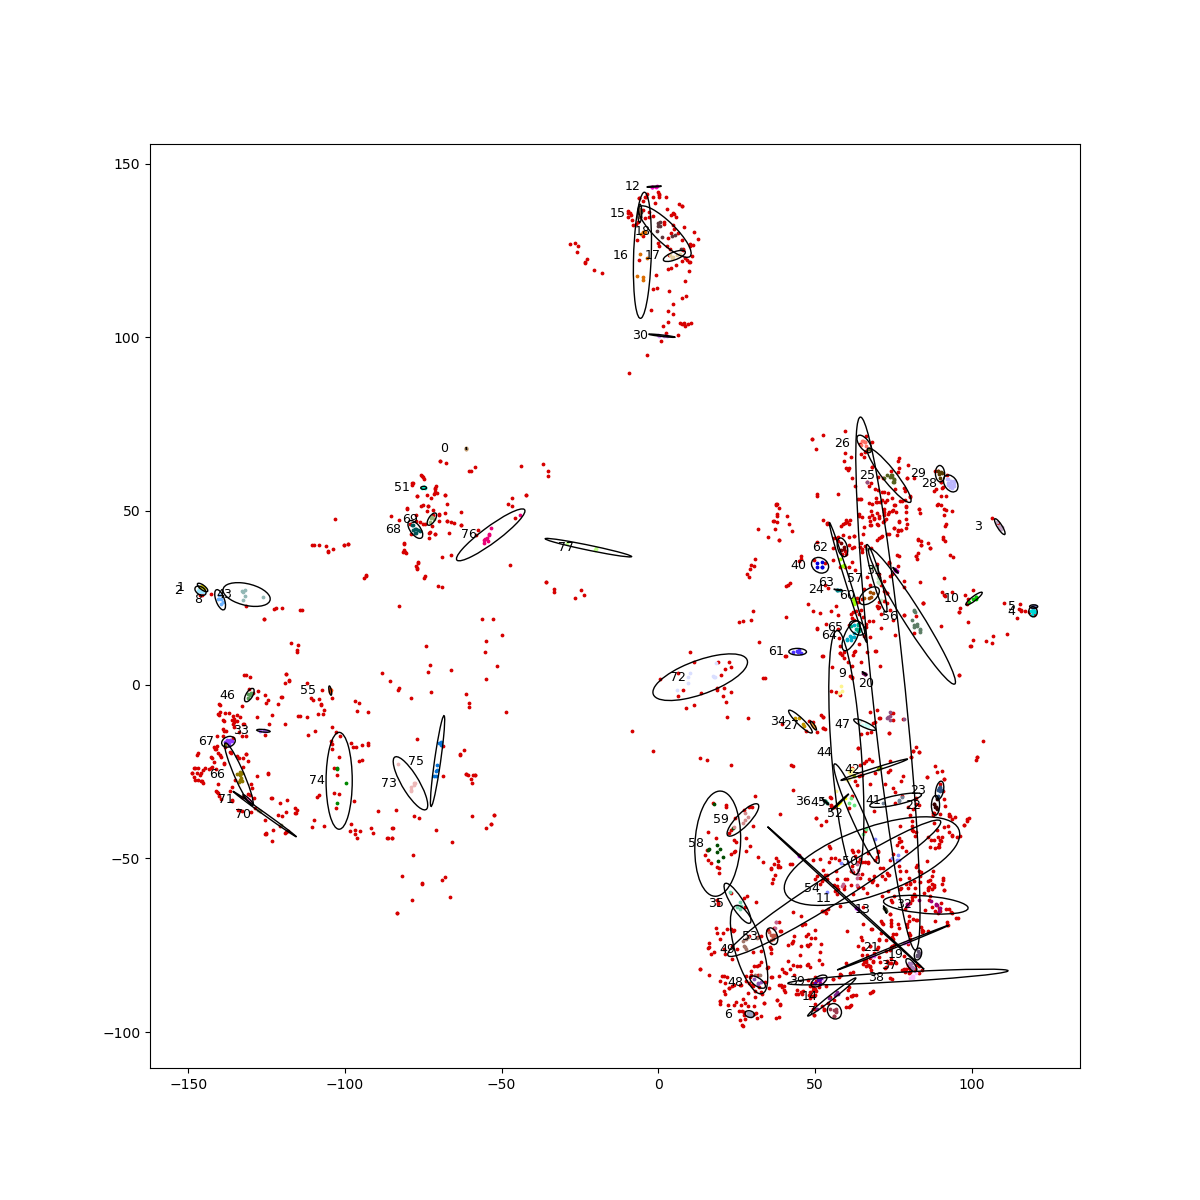

In [11]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(12, 12))
ax = plot_groups(df,"labels", ax=ax)
ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Output()

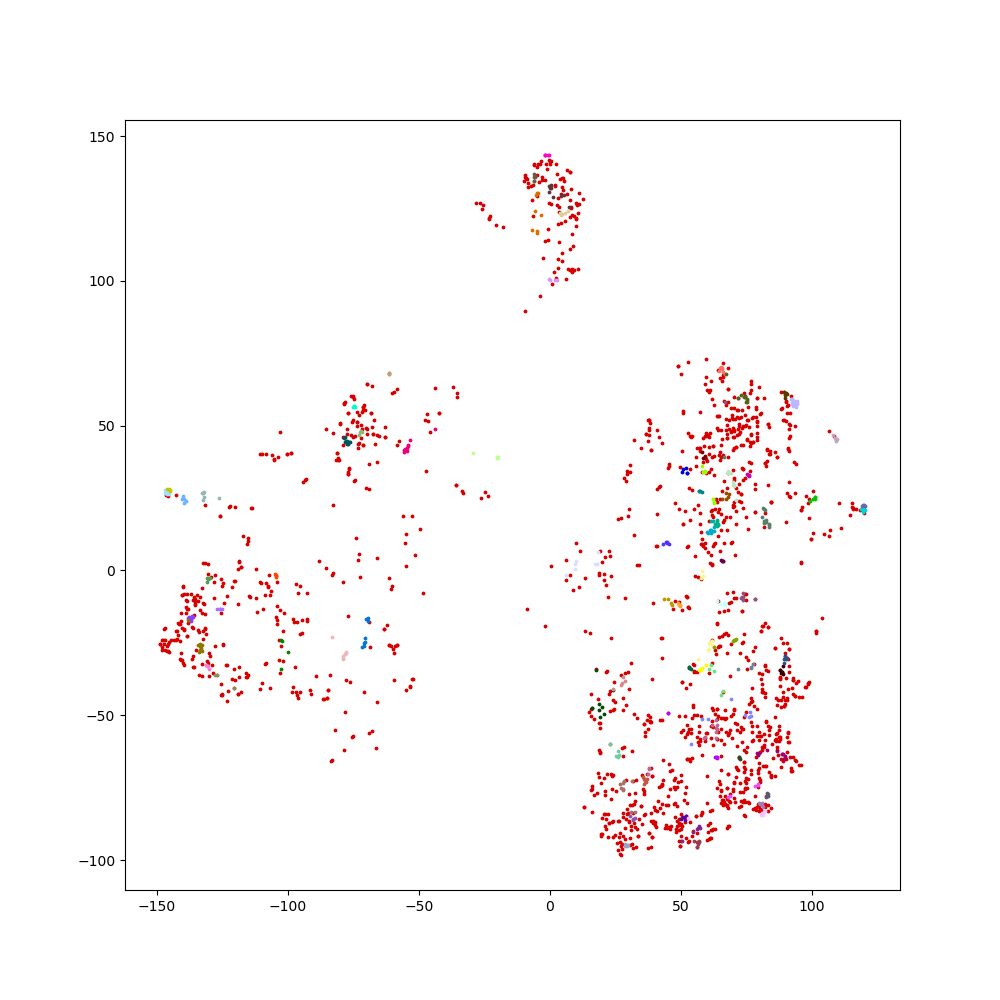

In [12]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_groups(df,"labels", ax=ax)
#ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()